# [**Ulam Spiral**](https://en.wikipedia.org/wiki/Ulam_spiral) #

### *A graphical depiction of the set of prime numbers, devised by mathematicial [Stanislaw Ulam](https://en.wikipedia.org/wiki/Stanislaw_Ulam).* ###

In [6]:
import math

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 20)

In [7]:
# Return a list whose indices represent the numbers between 1 and n 
# and whose values represent whether the number represented by that index
# is prime or not.
#
# Use it like this: 
#
# >>> is_prime = sieve_python(20)
# >>> is_prime[4]
# False
# >>> is_prime[7]
# True
def sieve_python(limit):
    prime = [True]*limit
    prime[0] = False
    prime[1] = False
    for d in range(2, int(limit**0.5) + 1):
        if prime[d]:
            for n in range(d*d, limit, d):
                prime[n] = False  
    return prime

In [8]:
# Direction definitions for the Cartesian plane
def up(x, y):
    return (x, y - 1)

def down(x, y):
    return (x, y + 1)

def right(x, y):
    return (x - 1, y)

def left(x, y):
    return (x + 1, y)

# Direction to the left, given current direction 
dir_to_left = {left: down, down: right, right: up, up: left}

def ulam_spiral_array(dimensions):

    # Canvas
    img = np.zeros(dimensions)

    # Mark all array entries as unvisited
    img[:] = -1

    # Center of array
    x_dim, y_dim = dimensions
    x_center = x_dim // 2
    y_center = y_dim // 2

    # Total number of elements in array
    pixels = img.ravel().shape[0]
    is_prime = sieve_python(limit=pixels)

    # Initialize array traversal
    cur_loc = (x_center, y_center)
    last_move_dir = down
    prime_count = 0

    # Starting at center, visit all elements of array in spiral pattern
    for step in range(pixels):
        # If step is a prime number, mark that pixel
        if is_prime[step]:
            img[cur_loc] = 1
            prime_count += 1
        else:
            img[cur_loc] = 0

        # Move to next pixel in the spiral
        left_of = dir_to_left[last_move_dir]
        if img[left_of(*cur_loc)] == -1:
            cur_loc = left_of(*cur_loc)
            last_move_dir = dir_to_left[last_move_dir]
        else:
            cur_loc = last_move_dir(*cur_loc)
    return img, prime_count

# Size 200 x 200 #

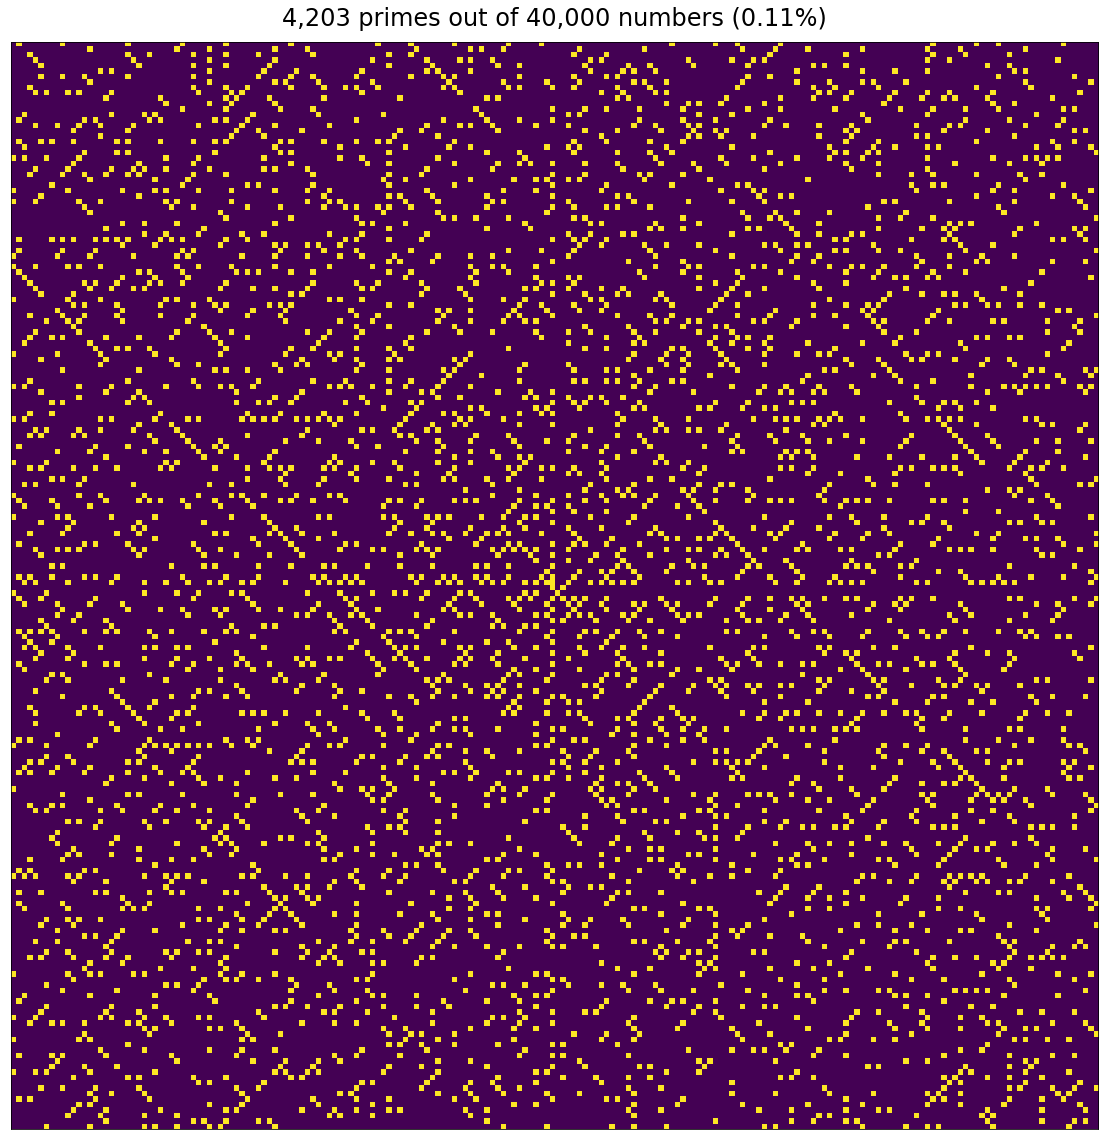

In [9]:
# Disable axis labels / tickmarks
plt.xticks([])
plt.yticks([])

img, n_primes = ulam_spiral_array((200,200))
n_numbers = img.shape[0] * img.shape[1]
perc_prime = round((n_primes / n_numbers), 2)
plt.title("{:,} primes out of {:,} numbers ({}%)".format(n_primes, n_numbers, perc_prime), fontsize=24, y=1.01)
imgplot = plt.imshow(img, cmap="viridis")

# Size 2000 x 2000 #

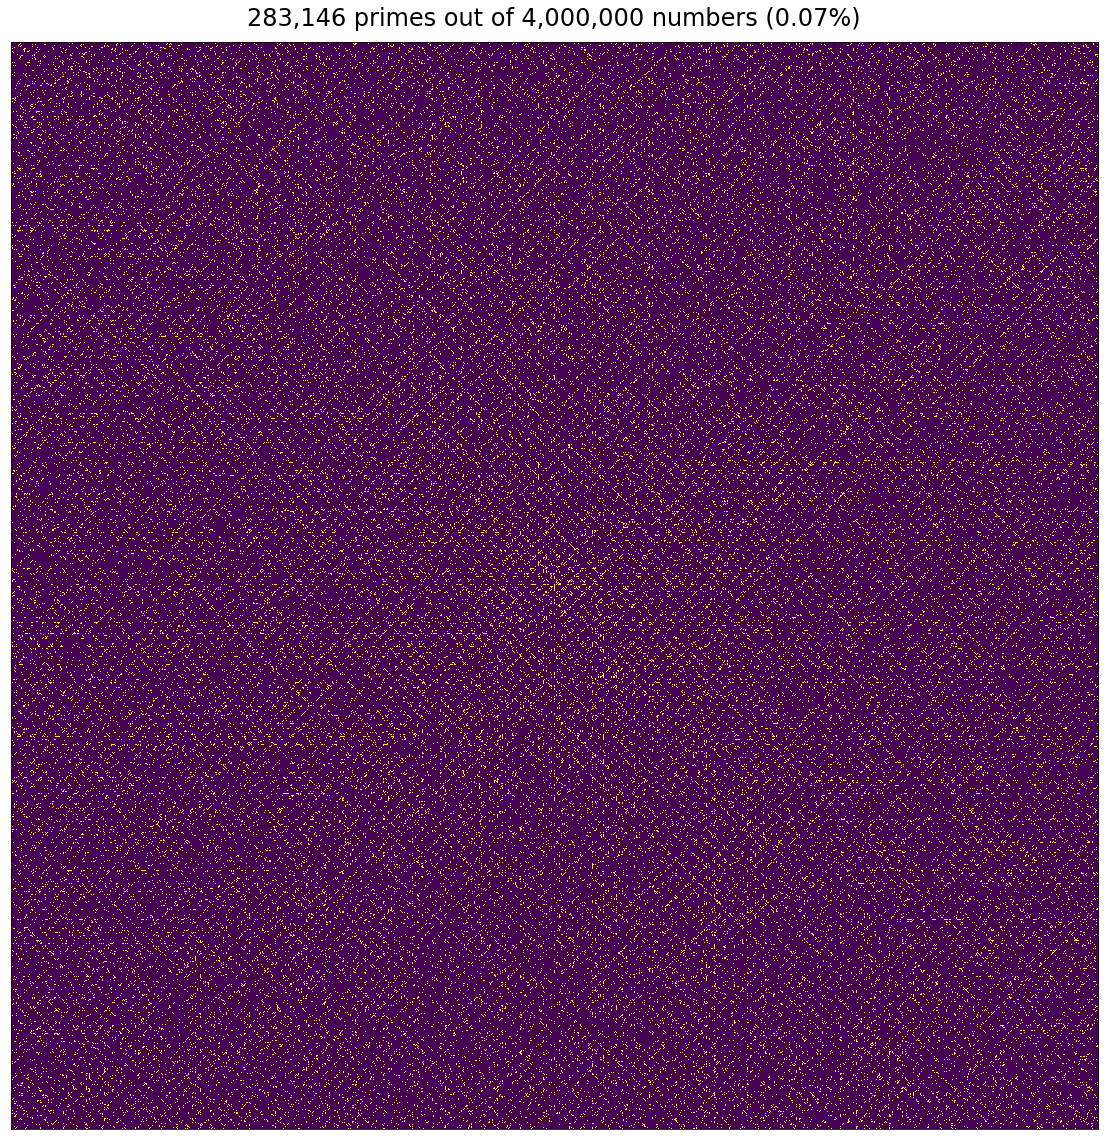

In [10]:
# Disable axis labels / tickmarks
plt.xticks([])
plt.yticks([])

img, n_primes = ulam_spiral_array((2000,2000))
n_numbers = img.shape[0] * img.shape[1]
perc_prime = round((n_primes / n_numbers), 2)
plt.title("{:,} primes out of {:,} numbers ({}%)".format(n_primes, n_numbers, perc_prime), fontsize=24, y=1.01)
imgplot = plt.imshow(img, cmap="viridis")